# Exponential Smoothing Procedures

## **PSMA 2020**

### Tom Monks, University of Exeter

In [3]:
import pandas as pd
import numpy as np

## Aims of Exponential Smoothing Procedures
* In the naive forecasting method we assumed that the most recent observation was the most important.
* In the average method, we used all observations, but gave them all equal weight (they were all equally important).
* Exponential smoothing falls between these two extremes.
 * ES forecasts are weighted averages of past observations.
 * More recent observations carry more weight than older ones;
 * Or to put it another way: the weights decrease exponentially as the observations get older.


## Types of Exponential Smoothing Procedure
* **Simple Exponential Smoothing (SES)**
 * No trend or seasonality
* **Holt's Linear Method**
 * Extends (SES) to include a linear trend
* **Holt-Winters Exponential Smoothing (HW)**
 * The most complex procedure that handles both trend and seasonality
 
Both Holt's linear method and HW can include a damped trend.

## Simple Exponential Smoothing (SES)
SES consists to two equations the forecast equation (1.1) and the smoothing equation (1.2):
<div class="alert alert-block alert-warning"><b>SES</b>

$F_{t+h} = l_t \tag{1.1}$

$l_{t} = \alpha y_t + (1 - \alpha) l_{t-1} \tag{1.2} $
</div>

**where** 
* $\alpha$ = a smoothing parameter between 0 and 1.
* $l_t$ = the current level at time t.
* $y_t$ = The ground truth / real world observation at time t

If you haven't worked with equations for a while this might look complicated.   The reality is that it is a very simple method. To output a forecast involves plugging a few numbers.

Equation (1.2) is called the smoothing or level equation.  In words level ($l_{t}$) is based on weighting the most recent observation ($y_t$) by a smoothing constant called $\alpha$ and weighting the previous level by $(1-\alpha)$.  

**Smoothing Example 1**

* $y_t = 150$
* $l_{t-1} = 120$
* $alpha = 0.2$
* $l_{t} = \alpha y_t + (1 - \alpha) l_{t-1}$

In [4]:
def smooth_level(obs, level, alpha):
    '''Returns a exponentially smoothed level assuming 
    no trend or seasonality'''
    return (alpha * obs) + ((1 - alpha)*level)

In [5]:
current_obs = 150
last_level = 120
alpha = 0.2

#call the function that implements the smoothing eq.
smooth_level(current_obs, last_level, alpha)

126.0

**Smoothing Example 2**

* $y_t = 150$
* $l_{t-1} = 120$
* $alpha = 0.8$

**Question: What happens when alpha is set to 0.0 or t 1.0?**

**What does this tell you about the role of alpha?**

In [6]:
current_obs = 150  #y_t
last_level = 120   #l_t-1
alpha = 0.8        

#call the function that implements the smoothing eq.
smooth_level(current_obs, last_level, alpha)

144.0

**Equation (1.1)** is called the *forecast equation*.  In words is means that the forecast h steps ahead is equal to the current level.  In otherwords **it is a flat forecast**.  It just carries the last value produced the smoothing equation forward.  We will see a visual example of that shortly.

**SES Forecast Example**

Given the following inputs, create a 6 step ahead forecast.

* $y_t = 150$
* $l_{t-1} = 120$
* $alpha = 0.2$

In [7]:
def flat_forecast(level, horizon):
    '''Returns a vector of length horizon with all values 
    set to level'''
    return np.full(shape=horizon, fill_value=level)

In [8]:
current_obs = 150
last_level = 120
ALPHA = 0.2
HORIZON = 6

#call the function that implements the smoothing eq.
new_level = smooth_level(current_obs, last_level, ALPHA)
flat_forecast(new_level, HORIZON)

array([126., 126., 126., 126., 126., 126.])

<img src="images/statsmodels-logo-v2-horizontal.svg" style="width: 200px;" align="left">

**The good news is that you do not need to implement SES or the other more complex versions of Exponential Smoothing.**

[statsmodels](https://www.statsmodels.org/stable/index.html) is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. 

There are two statsmodels libraries that you can use for SES.

```python
statsmodels.tsa.holtwinters.SimpleExpSmoothing
```
The `SimpleExpSmoothing` [class](https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html?highlight=simpleexpsmoothing#statsmodels.tsa.holtwinters.SimpleExpSmoothing) implements the SES equations described above.  It is fast easy to use and provides an optimisation procedure to automatically select the best $\alpha$ value.

```python
statsmodels.tsa.statespace.exponential_smoothing.ExponentialSmoothing
```

The `ExponentialSmoothing` class implements SES as a **statistical model**.  The theory of this is beyond the scope of this tutorial, but the fundermental idea is that the class provides a statistical model that is equivalent to the mathematical model outlined above.  The advantage of the statistical model is that point forecasts can be enhanced with a **prediction interval**.  Where possible, it is recommended that point forecasts are always accompanied by a prediction interval.  For this reason it is recommended that the [statespace implementation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.exponential_smoothing.ExponentialSmoothing.html?highlight=statespace%20exponential) is used over and above `SimpleExpSmoothing`.

For more information on the statespace formulation I recommend reading the relevant [chapter](https://otexts.com/fpp2/ets.html) Prof Rob Hyndman's free and open book on forecasting.

**SES Example: Nile flow data 1871 to 1930**

In [9]:
nile = pd.read_csv('/home/tom/Downloads/OneDrive/nile.csv', index_col='year', parse_dates=True)
nile.index.freq = "AS"

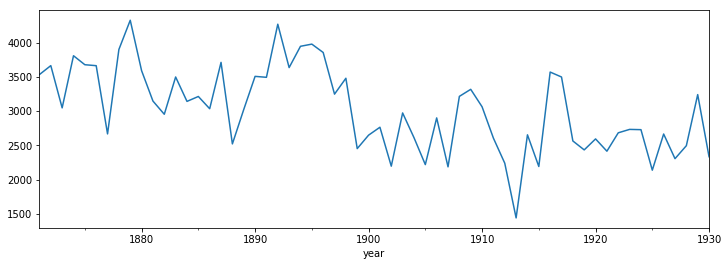

In [13]:
nile['flow'].plot(figsize=(12,4))

In [14]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

In [15]:
#lets predict the next dacade of flow.
HORIZON = 10

#for SES pass in the endog argument as your data
model = ExponentialSmoothing(endog=nile['flow'])
results = model.fit()

preds = results.get_forecast(steps=HORIZON)

#the summary_frame() method returns a pandas data frame.
#here alpha refers to alpha for a prediction interval 0.2 = 80% pred interval.
#make sure you don't confuse this alpha with the SES smoothing parameter!
preds.summary_frame(alpha=0.2).head(3)

flow,mean,mean_se,mean_ci_lower,mean_ci_upper
1931-01-01,2599.735739,510.173330,1945.922309,3253.549169
1932-01-01,2599.735739,529.925320,1920.609115,3278.862363
1933-01-01,2599.735739,548.967088,1896.206108,3303.265370


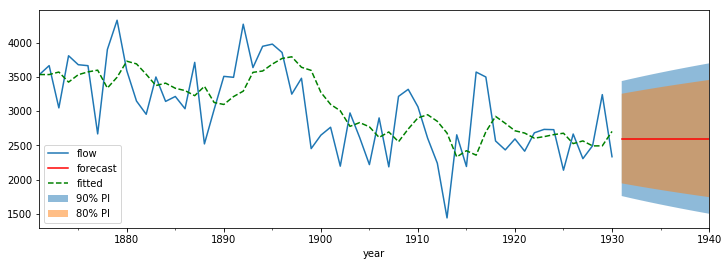

In [16]:
#plot the fitted values and prediction
ax = nile['flow'].plot(figsize=(12,4))
forecast_80 = preds.summary_frame(alpha=0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_90 = preds.summary_frame(alpha=0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]


ax.fill_between(forecast_90.index,forecast_90['mean_ci_lower'], forecast_90['mean_ci_upper'], 
                alpha=0.5,
                label='90% PI');

ax.fill_between(forecast_80.index,forecast_80['mean_ci_lower'], forecast_80['mean_ci_upper'], 
                alpha=0.5,
                label='80% PI');

forecast_80['mean'].plot(ax=ax, label='forecast', color='red');

results.fittedvalues.plot(ax=ax, label='fitted', color='green', linestyle='--')

ax.legend(loc=3);

In [17]:
#lets have a look at the fitted model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Exponential Smoothing Results                         
==============================================================================
Dep. Variable:                   flow   No. Observations:                   60
Model:                   ETS(A, N, N)   Log Likelihood                -459.221
Date:                Sat, 22 Feb 2020   AIC                            924.443
Time:                        22:15:17   BIC                            930.726
Sample:                    01-01-1871   HQIC                           926.900
                         - 01-01-1930   Scale                       260276.827
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.2809      0.099      2.832      0.005       0.087       0.475
initial_level    3533.9160    728.298      4.852      0.000    2106.477    4961.355
===================================================================================
Ljung-Box (Q):                       29.74   Jarque-Bera (JB):                 0.10
Prob(Q):                              0.88   Prob(JB):                         0.95
Heteroskedasticity (H):               1.34   Skew:                             0.08
Prob(H) (two-sided):                  0.52   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Holt's Method for Linear Trend

Holt's linear method adds a second smoothing parameter $\beta$ and a third equation representing the trend.

<div class="alert alert-block alert-warning"><b>Holt's Linear Method</b>

$F_{t+h} = l_t + hb_t \tag{2.1}$

\begin{equation}
    l_t = \alpha Y_t + (1 - \alpha) (l_{t-1} + b_{t-1}) \tag{2.2}
\end{equation} 

\begin{equation}
    b_t = \beta (l_t - l_{t-1}) + (1 - \beta)b_{t-1} \tag{2.3}
\end{equation}
</div>


**Example: US Gross Domestic Product 1920 to 2019.**

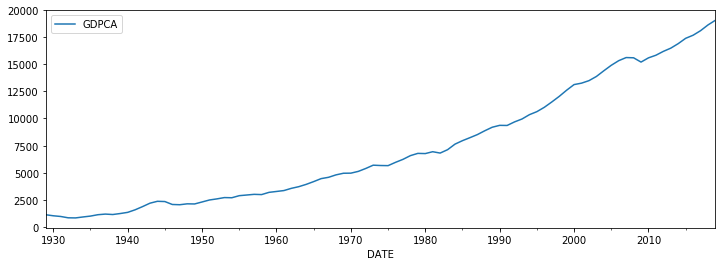

In [18]:
train = pd.read_csv('data/GDPCA.csv', index_col='DATE', parse_dates=True)
train.index.freq = 'AS'
train.plot(figsize=(12,4));

In [19]:
#forecast 30 years ahead.
HORIZON = 30

#pass in the trend parameter as true
model = ExponentialSmoothing(endog=train, trend=True)
results = model.fit()

preds = results.get_forecast(steps=HORIZON)

#here alpha refers to alpha for a prediction interval 
#(not to be confused with the smoothing parameter!)
preds.summary_frame(alpha=0.2).head(2)

GDPCA,mean,mean_se,mean_ci_lower,mean_ci_upper
2020-01-01,19463.374830,162.511653,19255.107767,19671.641894
2021-01-01,19854.250129,254.435250,19528.178236,20180.322022


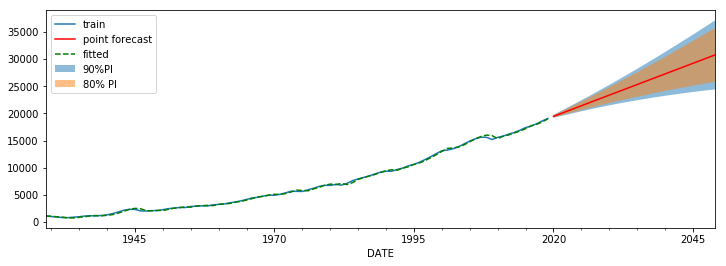

In [20]:
ax = train.plot(figsize=(12,4))

forecast_80 = preds.summary_frame(alpha=0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_90 = preds.summary_frame(alpha=0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]


ax.fill_between(forecast_90.index,forecast_90['mean_ci_lower'], forecast_90['mean_ci_upper'], 
                alpha=0.5,
                label='90% PI');

ax.fill_between(forecast_80.index,forecast_80['mean_ci_lower'], forecast_80['mean_ci_upper'], 
                alpha=0.5,
                label='80% PI');

forecast_90['mean'].plot(ax=ax, color='red')
results.fittedvalues.plot(ax=ax, color='green', linestyle='--')
ax.legend(['train', 'point forecast', 'fitted','90%PI', '80% PI']);

### Introducing a damped trend.

It is often beneficial to introduce a damped trend into long term forecasting.  The following code illustrates the procedure.

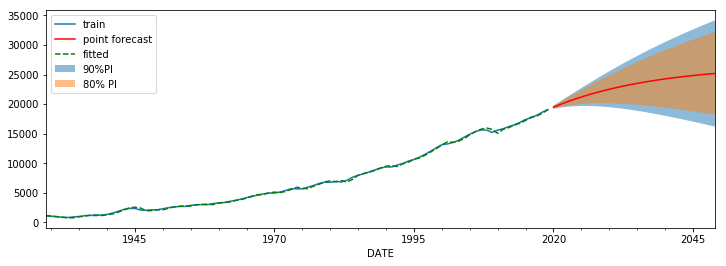

In [21]:
#forecast 30 years ahead.
HORIZON = 30

#note the damped_trend parameter
model = ExponentialSmoothing(endog=train, trend=True, damped_trend=True)
results = model.fit()
preds = results.get_forecast(steps=HORIZON)

ax = train.plot(figsize=(12,4))
forecast_80 = preds.summary_frame(alpha=0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_90 = preds.summary_frame(alpha=0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
ax.fill_between(forecast_90.index,forecast_90['mean_ci_lower'], forecast_90['mean_ci_upper'], 
                alpha=0.5,
                label='90% PI');
ax.fill_between(forecast_80.index,forecast_80['mean_ci_lower'], forecast_80['mean_ci_upper'], 
                alpha=0.5,
                label='80% PI');
forecast_90['mean'].plot(ax=ax, color='red')
results.fittedvalues.plot(ax=ax, color='green', linestyle='--')
ax.legend(['train', 'point forecast', 'fitted','90%PI', '80% PI']);

## Holt-Winters Exponential Smoothing

* Holt-Winters (HW) Exponential Smoothing procedures handle **trend and seasonality**. 
* There are two versions of HW that that handle additive and multiplicative seasonality.
* In both cases a seasonality equation and a seasonal smoothing constant $\gamma$ are added.
* The level $l_t$ is seasonally adjusted
 * additive model: the seasonal component is an absolute value subtracted from the level
 * multiplicative model: the seasonal component is a percentage.  The level is divided by it.





### Additive Method

The additive approach is used when the variance in the data is roughly constant.  

<font size="4">
<div class="alert alert-block alert-warning"><b>HW Additive</b>

$F_{t+h} = l_t + hb_t + s_{t+h-m(k+1)}\tag{3.1}$

\begin{equation}
    l_t = \alpha (y_t - s_{t-m}) + (1 - \alpha) (l_{t-1} + b_{t-1}) \tag{3.2}
\end{equation} 

\begin{equation}
    b_t = \beta (l_t - l_{t-1}) + (1 - \beta)b_{t-1} \tag{3.3}
\end{equation}

\begin{equation}
    s_t = \gamma (y_t - l_t - s_{t-m}) + (1 - \gamma) s_{t-m} \tag{3.4}
\end{equation}
</div>
    </font>

**Additive example.  Australian quarterly beer production**

In [22]:
from pmdarima.datasets import load_ausbeer

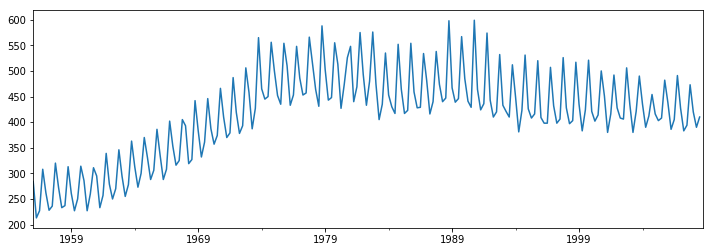

In [23]:
ausbeer = load_ausbeer(as_series=True)
#index is 1956:Q1 to 2008:Q3
ausbeer.index = pd.date_range(start='1956Q1', periods=212, freq='Q')
ausbeer.plot(figsize=(12,4));

In [24]:
#lets predict the next 10 years
HORIZON = 40

#for SES pass in the endog argument as your data
model = ExponentialSmoothing(endog=ausbeer, seasonal=4)
results = model.fit()

preds = results.get_forecast(steps=HORIZON)
preds.summary_frame(alpha=0.2).head(3)

y,mean,mean_se,mean_ci_lower,mean_ci_upper
2009-03-31,427.153273,17.317724,404.959717,449.346829
2009-06-30,388.977848,18.075695,365.812913,412.142783
2009-09-30,405.236557,18.803136,381.139368,429.333746


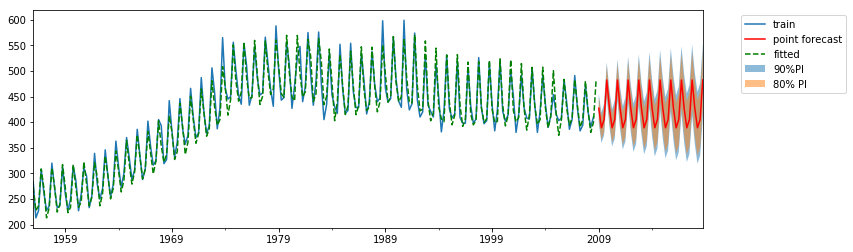

In [25]:
ax = ausbeer.plot(figsize=(12,4))
forecast_80 = preds.summary_frame(alpha=0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_90 = preds.summary_frame(alpha=0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
ax.fill_between(forecast_90.index,forecast_90['mean_ci_lower'], forecast_90['mean_ci_upper'], 
                alpha=0.5,
                label='90% PI');
ax.fill_between(forecast_80.index,forecast_80['mean_ci_lower'], forecast_80['mean_ci_upper'], 
                alpha=0.5,
                label='80% PI');
forecast_90['mean'].plot(ax=ax, color='red')
results.fittedvalues.plot(ax=ax, color='green', linestyle='--')
ax.legend(['train', 'point forecast', 'fitted','90%PI', '80% PI'], bbox_to_anchor=(1.05, 1), loc=2);

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Exponential Smoothing Results                         
==============================================================================
Dep. Variable:                      y   No. Observations:                  212
Model:                   ETS(A, N, A)   Log Likelihood                -891.225
Date:                Sat, 22 Feb 2020   AIC                           1796.450
Time:                        22:16:06   BIC                           1819.946
Sample:                    03-31-1956   HQIC                          1805.946
                         - 12-31-2008   Scale                          273.076
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.3134      0.048      6.504      0.000       0.219       0.408
smoothing_seasonal     0.2472      0.044      5.581      0.000       0.160       0.334
initial_level        261.5900     18.690     13.996      0.000     224.957     298.223
initial_seasonal.0    50.8951     21.200      2.401      0.016       9.344      92.446
initial_seasonal.1   -24.1667     17.227     -1.403      0.161     -57.930       9.597
initial_seasonal.2   -37.8988     13.000     -2.915      0.004     -63.378     -12.420
===================================================================================
Ljung-Box (Q):                       89.75   Jarque-Bera (JB):                 6.74
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               1.28   Skew:                            -0.01
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Multiplicative Method

The multiplicative approach is used when variance in the data increases/decreases over time.

<font size="4">
<div class="alert alert-block alert-warning"><b>HW Mutliplicative</b>
$F_{t+h} = (l_t + hb_t)s_{t+h-m(k+1)}\tag{3.5}$

\begin{equation}
    l_t = \alpha \frac{y_t}{s_{t-m}} + (1 - \alpha) (l_{t-1} + b_{t-1}) \tag{3.6}
\end{equation} 

\begin{equation}
    b_t = \beta (l_t - l_{t-1}) + (1 - \beta)b_{t-1} \tag{3.7}
\end{equation}

\begin{equation}
    s_t = \gamma \frac{y_t}{l_t - s_{t-m}} + (1 - \gamma) s_{t-m} \tag{3.8}
\end{equation}
</div>
    </font>


**Multiplicative Seasonality Example: Alcohol Sales $m**

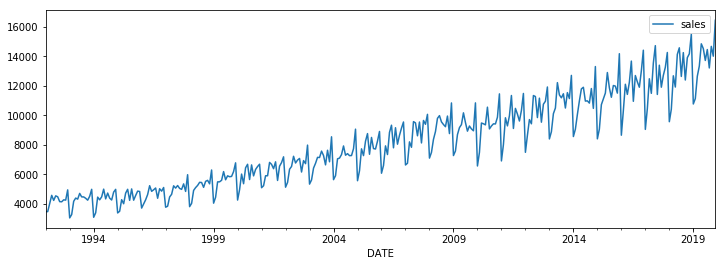

In [27]:
#Example sales of beer wine IN $m
train = pd.read_csv('data/Alcohol_Sales.csv', index_col='DATE', parse_dates=True)
train.index.freq = 'MS'
train.plot(figsize=(12,4));

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [29]:
#forecast 120 months ahead.
HORIZON = 120

#trend='add' means model with a linear trend. seasonal='mul' means to use multiplicative seasoniality.
model = ExponentialSmoothing(endog=train, trend='mul', seasonal='mul', 
                             seasonal_periods=12)
results = model.fit()
preds = results.forecast(steps=HORIZON)

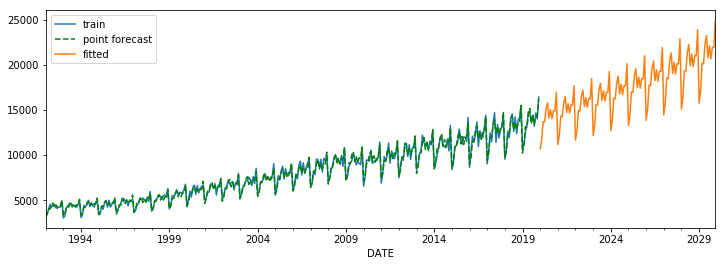

In [30]:
idx = pd.date_range(start='2020-01-01', periods=HORIZON, freq='MS')
ax = train.plot(figsize=(12,4))
results.fittedvalues.plot(ax=ax, color='green', linestyle='--')
pd.Series(preds, index=idx).plot(ax=ax);
ax.legend(['train', 'point forecast', 'fitted']);

* **Question: what happens if we assume additive seasonality or multiplicative trend?**

In [31]:
#let's have a look at the fitted model
results.summary()

Dep. Variable:,endog,No. Observations:,336
Model:,ExponentialSmoothing,SSE,41353128.491
Optimized:,True,AIC,3970.104
Trend:,Multiplicative,BIC,4031.178
Seasonal:,Multiplicative,AICC,3972.262
Seasonal Periods:,12,Date:,"Sat, 22 Feb 2020"
Box-Cox:,False,Time:,22:16:34
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1075954,alpha,True
smoothing_slope,5.7875e-24,beta,True
